In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

## 4.1 Roulette

In [2]:
def fitness_1(x: int):
    return abs(x)

def fitness_2(x: int):
    return x*x

def fitness_3(x: int):
    return 2*x*x

def fitness_4(x: int):
    return x*x+20

def calculate_probability(fitness_list):
    """calculate probability according to roulette selection"""
    total_fitness = sum(fitness_list)
    
    return list(map(lambda x: x/total_fitness, fitnesses))


In [3]:
xs = [2,3,4]
fitness_functions = [fitness_1, fitness_2, fitness_3, fitness_4]

table = []
for f in fitness_functions:
    fit_fun_probs = []
    fitnesses = list(map(lambda x: f(x), xs))
    probs = calculate_probability(fitnesses)
    table.append(probs)
table = np.array(table)
table

array([[0.22222222, 0.33333333, 0.44444444],
       [0.13793103, 0.31034483, 0.55172414],
       [0.13793103, 0.31034483, 0.55172414],
       [0.26966292, 0.3258427 , 0.40449438]])

In [12]:
def create_pie_chart(probabilities, mylabels, save_pth=None, title=""):
    probabilities = np.array(probabilities)
#     mylabels = list(map(lambda x: x[1] + " --> " + f"{x[0]:.2f}", zip(probabilities, mylabels)))

    plt.pie(probabilities, startangle = 90, autopct=lambda p: '{:.0f}%'.format(p))
    plt.legend(xs, title="Individuals")
    plt.title(title)
    if save_pth is not None:
        plt.savefig(save_pth, bbox_inches='tight')
    
    plt.show()

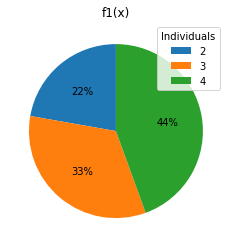

In [13]:
create_pie_chart(table[0], list(map(lambda x: "x=" + str(x), xs)), "images/f1.png", "f1(x)")

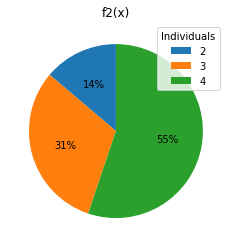

In [14]:
create_pie_chart(table[1], ["x=2", "x=3", "x=4"], "images/f2.png","f2(x)")

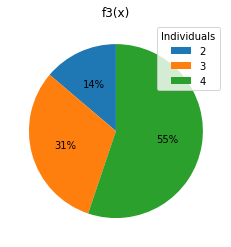

In [15]:
create_pie_chart(table[2], ["x=2", "x=3", "x=4"], "images/f3.png", "f3(x)")

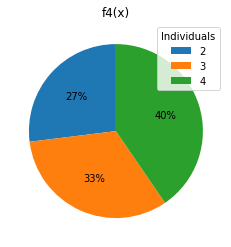

In [16]:
create_pie_chart(table[3], ["x=2", "x=3", "x=4"], "images/f4.png", "f4(x)")

## 4.2 (1+1) GA

In [17]:
def is_correct(x:str):
    return len(x) == x.count('1')

def one_plus_one_fitness(x):
    return x.count('1')

def generate_bit_sequence(length):
    binary_string = ""
    for i in range(length):
        binary_string += str(random.randint(0, 1))
    return binary_string

def mutate(x, mi):
    output = copy.deepcopy(x)
    switch = [random.uniform(0,1) < mi for x in output]
    
    output = list(map(lambda x: '0' if ((x[0] == '0' and not x[1]) or (x[0] == '1' and x[1]))  else '1', zip(output, switch)))
    return "".join(output)



def evolve(seq, mi, depth=1500, alw_replace=False):
    mut = mutate(seq, mi)
    seq_fit = one_plus_one_fitness(seq)
    mut_fit = one_plus_one_fitness(mut)
    
    # end conditions
    if depth == 0:
        return seq, []
    
    # recursion
    if alw_replace:
        out, fitn = evolve(mut, mi, depth - 1, alw_replace)
        fitn.append(mut_fit if len(fitn) == 0 else (mut_fit if mut_fit > fitn[-1] else fitn[-1]))
    else:
        if mut_fit > seq_fit:
            out, fitn = evolve(mut, mi, depth - 1, alw_replace)
            fitn.append(mut_fit)
        else:
            out, fitn = evolve(seq, mi, depth - 1, alw_replace)
            fitn.append(seq_fit)
        
    # reverse best fitness history to correct order
    if depth == 1500 and not alw_replace:
        fitn.reverse()
    
    return out, fitn

def plot_figure(history, save_path=None):
    plt.plot(history)
    
    # save it
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()
    
def do_experiment(l, mi, alw_replace=False):
    seq = generate_bit_sequence(l)
    evolved, history = evolve(seq, mi, 1500, alw_replace)
#     plot_figure(history, "images/init.png")
#     print("IN:", seq, "RESULT:", evolved, sep="\n")
    
    return evolved, history

REPLACE MUTATED SOLUTION IF IS BETTER THAN CURRENT SOLUTION:
Correct solutions =  6


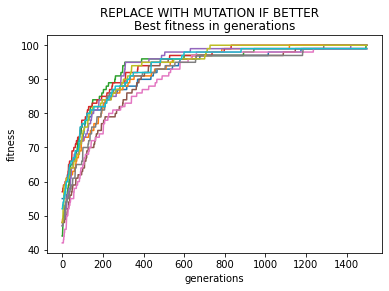

In [23]:
l = 100
mi = 1/l
# ===========
correct_solutions = 0
for i in range(10):
    evolved, history = do_experiment(l, mi, False)
    plt.plot(history)
    correct_solutions += 1 if is_correct(evolved) else 0

print("REPLACE MUTATED SOLUTION IF IS BETTER THAN CURRENT SOLUTION:")
print("Correct solutions = ", correct_solutions)
plt.suptitle("REPLACE WITH MUTATION IF BETTER")
plt.title("Best fitness in generations")
plt.xlabel("generations")
plt.ylabel("fitness")
plt.savefig("images/1p1_exp_improving.png", bbox_inches='tight')
plt.show()

ALWAYS REPLACE CURRENT SOLUTION WITH MUTATED ONE
Correct solutions =  0


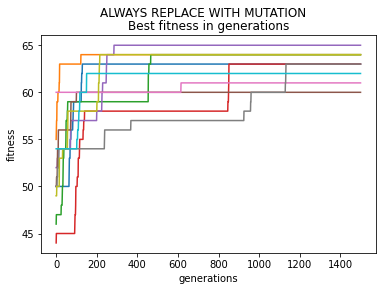

In [24]:
l = 100
mi = 1/l
# ===========
correct_solutions = 0
for i in range(10):
    evolved, history = do_experiment(l, mi, True)
    plt.plot(history)
    correct_solutions += 1 if is_correct(evolved) else 0

print("ALWAYS REPLACE CURRENT SOLUTION WITH MUTATED ONE")
print("Correct solutions = ", correct_solutions)
plt.suptitle("ALWAYS REPLACE WITH MUTATION")
plt.title("Best fitness in generations")
plt.xlabel("generations")
plt.ylabel("fitness")
plt.savefig("images/1p1_exp_nonimproving.png",  bbox_inches='tight')
plt.show()